#Insruction

1. Use the salary data
2. Handles Incomplete, noise and inconsistent values



#Data Preprocessing-Cleaning

 1. Incomplete (Missing Values)
 2. Noise (Either errors)
 3. Inconsistent

In [2]:
import pandas as pd

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/salary.csv')

In [267]:
#Convert "salary" string to integers
Salary = "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)"
df[Salary] = df[Salary].replace(',', '' , regex = True) # this replace the comma ',' in 55,000 to 55000
df[Salary] = df[Salary].astype(int)  # this convert the column datatypes from object into numbers , in this case integer

In [264]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,Other,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


#1. Incomplete data/Missing values


* Reference (https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python)
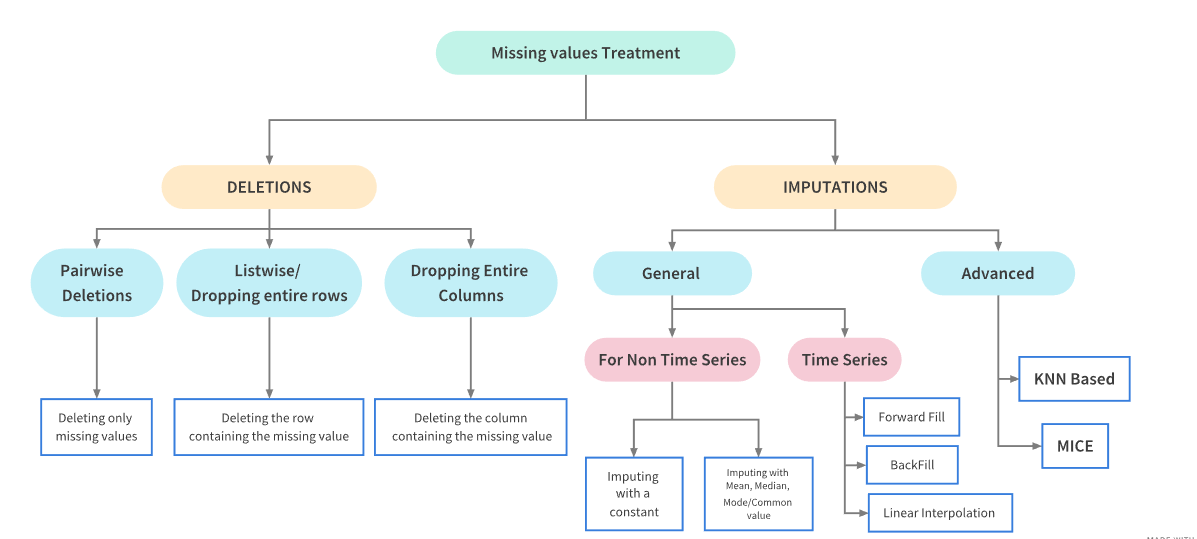
* There are 3 columns which has a lot of nulls/missing data



In [261]:
# Use df.info to identify which columns has a lot of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    Gender           131 non-null    object
 1    Age              131 non-null    int64 
 2    Height (cm)      131 non-null    int64 
 3    Weight (kg)      131 non-null    int64 
 4    Occupation       131 non-null    object
 5    Education Level  131 non-null    object
 6    Marital Status   131 non-null    object
 7    Income (USD)     131 non-null    int64 
 8    Favorite Color   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [268]:
 # Write a code to return the number of rows with missing values under the column 'Compensation'?
Compensation = "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits."
print(df[Compensation].isna().sum())

7356


In [272]:
# Write a function that returns the each column name with the number of missing values.
missing_counts = df.isna().sum()

# Filter the Series to only include columns with one or more missing values
columns_with_missing = missing_counts[missing_counts > 0]  # it is like filter the 0

print('--Columns and the number of missing values--')

# Loop through the filtered Series and print in the desired format
for column_name, n_missing in columns_with_missing.items():  #.items is make the data into a list of (key, value)pairs
  print(f'{column_name} : {n_missing}')

--Columns and the number of missing values--
What industry do you work in? : 81
Job title : 2
If your job title needs additional context, please clarify here: : 20896
How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits. : 7356
If "Other," please indicate the currency here:  : 27963
If your income needs additional context, please provide it here: : 25130
If you're in the U.S., what state do you work in? : 5056
What city do you work in? : 82
What is your highest level of education completed? : 236
What is your gender? : 182
What is your race? (Choose all that apply.) : 190


In [269]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'How old are you?',
       'What industry do you work in?', 'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have over

#1.1 Dropping columns with too many missing values

In [ ]:
#Drop columns with too many missing values
# Using the exact column names from df.columns output to prevent KeyError
Context = "If your job title needs additional context, please clarify here:"
Other_currency = "If \"Other,\" please indicate the currency here: "
Salary_context = "If your income needs additional context, please provide it here:"
columns_to_drop = [Context, Other_currency, Salary_context]

df = df.drop(columns = columns_to_drop, errors = 'ignore')

print("Successfully dropped any of those columns that existed.")


Successfully dropped any of those columns that existed.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28180 entries, 0 to 28179
Data columns (total 16 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Unnamed: 0                                                                                                                                                                                                                            28180 non-null  int64  
 1   Timestamp                                                                                                    

#1.2 Dropping missing values




*   We can drop missing values here using dropna() function.

*   If we do dropna() without specifying any parameter, it will drop rows that has even 1 missing values
*  If we do dropna(thresh=2) it will drop rows that has more than 2 missing values


*  If we do dropna(how=all) it will drop only rows where all values are missing


*   [Ref] (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)






In [ ]:
# Compare the number of rows before and after dropna()

In [ ]:
len(df)

28180

In [ ]:
len(df.dropna())

17041

#1.4 Impute missing values with most frequent


*   A simple method where we don't analyse per column.

*   We can impute missing values for all related columns using most frequent.
*   Imputed values can be the mean, median. This is changed in the 'strategy' parameter.

*   There are other simple methods for imputing missing values. Eg fill.na()



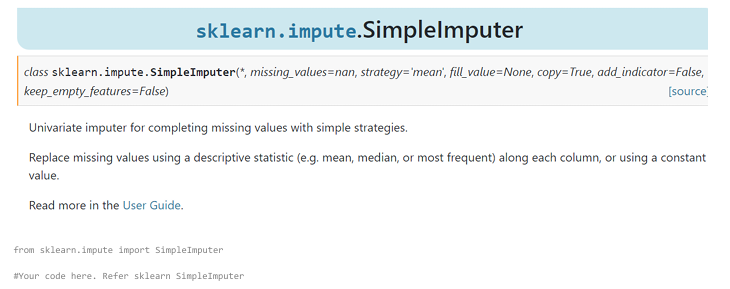

In [18]:
from sklearn.impute import SimpleImputer

In [31]:
import numpy as np
# Create a sample DataFrame with missing values
data = {
    'Age': [25, -30, np.nan, 35, 40, 45],
    'Salary': [50000, 60000, 75000, np.nan, 120000, 80000],
    'Favorite_Color': ['Blue', 'Red', 'Green', 'Red', np.nan, 'Blue']
}
df_test = pd.DataFrame(data)
print("-- Original DataFrame --")
print(df_test)


-- Original DataFrame --
    Age    Salary Favorite_Color
0  25.0   50000.0           Blue
1 -30.0   60000.0            Red
2   NaN   75000.0          Green
3  35.0       NaN            Red
4  40.0  120000.0            NaN
5  45.0   80000.0           Blue


In [32]:
num_cols = ['Age', 'Salary'] #  numerical columns
cat_cols = ['Favorite_Color'] # categorial columns

# Create the imputers
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
#imputer_const = SimpleImputer(strategy='constant', fill_value='Unknown')  --> this also can

# Fit, transform, and overwrite the original columns
# This modifies 'df_test' directly

df_test[num_cols] = imputer_num.fit_transform(df_test[num_cols])
df_test[cat_cols] = imputer_cat.fit_transform(df_test[cat_cols])
#df_test[cat_cols] = imputer_const.fit_transform(df_test[cat_cols]) --> this also caan

print("\n--- Directly Transformed DataFrame ---")
print(df_test)


--- Directly Transformed DataFrame ---
    Age    Salary Favorite_Color
0  25.0   50000.0           Blue
1 -30.0   60000.0            Red
2  35.0   75000.0          Green
3  35.0   75000.0            Red
4  40.0  120000.0           Blue
5  45.0   80000.0           Blue


# 2. Noisy data


*   Noise can be random errors and/or outliers.
*   It can also be non-sensible data

## 2.1 Remove outliers


*   Use boxplot or histograms to nd outliers (df.boxplot() or df.hist()
*   Outliers are values that are waaay higher or lower than most of the data. Usually there are not many data points like this. So we can
 consider this as noise



<Axes: >

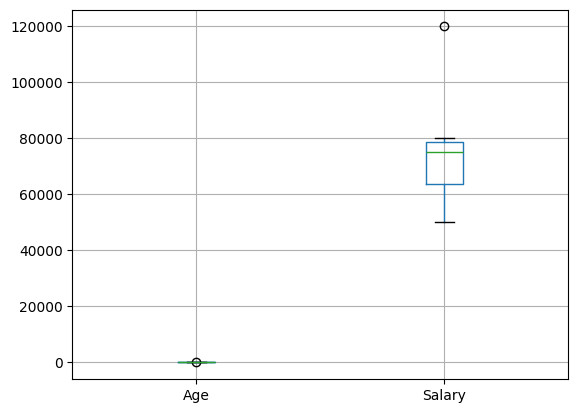

In [33]:
df_test.boxplot()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

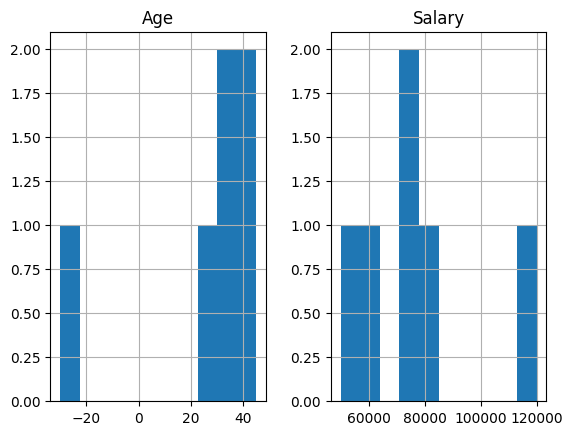

In [34]:
df_test.hist()



*    Can remove using stats  [Ref] https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
*   Can also remove manually




In [16]:
from scipy import stats

print("--- Original DataFrame ---")
print(df_test)


--- Original DataFrame ---
    Age   Salary Favorite_Color  Salary_Z_Score
0  25.0  50000.0           Blue        1.216457
1  30.0  60000.0            Red        0.760286
2  35.0  75000.0          Green        0.076029
3  35.0  75000.0            Red        0.076029
5  45.0  80000.0           Blue        0.152057


In [14]:
# 1. Calculate Z-scores
# We only need them to find the indices
salary_z_scores = np.abs(stats.zscore(df_test['Salary']))
df_test['Salary_Z_Score'] = salary_z_scores
print("\n--- DataFrame with Z-scores ---")
print(df_test)
# 2. Define the threshold
threshold = 1.3

# 3. Find the indices (row labels) of the outliers to drop
# We get the index where the Z-score is > threshold
outlier_indices = df_test[salary_z_scores > threshold].index

# 4. Drop those indices directly from the original df
df_test = df_test.drop(outlier_indices)

print("\n--- DataFrame After Dropping Outlier (No Copy) ---")
print(df_test)


--- DataFrame with Z-scores ---
    Age    Salary Favorite_Color  Salary_Z_Score
0  25.0   50000.0           Blue        1.216457
1  30.0   60000.0            Red        0.760286
2  35.0   75000.0          Green        0.076029
3  35.0   75000.0            Red        0.076029
4  40.0  120000.0           Blue        1.976743
5  45.0   80000.0           Blue        0.152057

--- DataFrame After Dropping Outlier (No Copy) ---
    Age   Salary Favorite_Color  Salary_Z_Score
0  25.0  50000.0           Blue        1.216457
1  30.0  60000.0            Red        0.760286
2  35.0  75000.0          Green        0.076029
3  35.0  75000.0            Red        0.076029
5  45.0  80000.0           Blue        0.152057


#2.2 Remove non sensible values


*  Use df.describe()



In [39]:
df_test = df_test[df_test['Age'] > 0]

In [25]:
df_test.describe()

,Age,Salary
count,6.000000,6.000000
mean,25.000000,76666.666667
std,27.748874,24013.884872
min,-30.000000,50000.000000
25%,27.500000,63750.000000
50%,35.000000,75000.000000
75%,38.750000,78750.000000
max,45.000000,120000.000000


In [43]:
df_test.describe()

,Age,Salary
count,5.000000,5.000000
mean,36.000000,80000.000000
std,7.416198,25248.762346
min,25.000000,50000.000000
25%,35.000000,75000.000000
50%,35.000000,75000.000000
75%,40.000000,80000.000000
max,45.000000,120000.000000


In [44]:
print(df_test)

    Age    Salary Favorite_Color
0  25.0   50000.0           Blue
2  35.0   75000.0          Green
3  35.0   75000.0            Red
4  40.0  120000.0           Blue
5  45.0   80000.0           Blue


#3. Inconsistent data

*   Find 'duplicated' rows. For example 'Academia' , 'Academic', 'Academia/Research' should be the same. One way is to use fuzzy matching
(fuzzywuzzy package)

*   Find typos
*   Warning , this is very tedious


*   [Ref] (https://www.kaggle.com/code/ramjan135/data-cleaning-challenge-inconsistent-data-entry)




In [48]:
!pip install fuzzywuzzy

In [81]:
import pandas as pd
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

np.random.seed(0)

In [151]:
# look at the first ten thousand bytes to guess the character encoding
with open("/content/drive/MyDrive/Dataset/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [152]:
# read in our dat
suicide_attacks = pd.read_csv("/content/drive/MyDrive/Dataset/PakistanSuicideAttacks Ver 11 (30-November-2017).csv",
                              encoding='Windows-1252')

In [154]:
suicide_attacks.columns

Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [153]:
cities = suicide_attacks['City'].unique()  #get the different city name which is not repeating

cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [155]:
#convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
#remove trailing white spaces  //it does not remove the white space between the string
suicide_attacks['City'] = suicide_attacks['City'].str.strip()

In [159]:
#find unique value in the "Province" column

cities1 = suicide_attacks['Province'].unique()
cities.sort()
cities1

array(['Capital', 'Sindh', 'Baluchistan', 'Punjab', 'FATA', 'KPK', 'AJK',
       'Fata', 'Balochistan'], dtype=object)

In [165]:
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()

#Use fuzzy matching to correct inconsistent data entry

In [167]:
cities = suicide_attacks['City'].unique()

cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'kurram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=

In [169]:
cities1 = suicide_attacks['Province'].unique()

cities1.sort()
cities1

array(['ajk', 'balochistan', 'baluchistan', 'capital', 'fata', 'kpk',
       'punjab', 'sindh'], dtype=object)

In [175]:
# get the top 10 closedt matches to "d.i khan"
matches = fuzzywuzzy.process.extract("d.i khan", cities, limit = 10
, scorer = fuzzywuzzy.fuzz.token_sort_ratio)

matches


[('d. i khan', 100),
 ('d.i khan', 100),
 ('d.g khan', 88),
 ('khanewal', 50),
 ('sudhanoti', 47),
 ('hangu', 46),
 ('kohat', 46),
 ('dara adam khel', 45),
 ('chaman', 43),
 ('mardan', 43)]

In [176]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("All done!")

In [177]:
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df = suicide_attacks, column = 'City', string_to_match="d.i khan")

All done!


In [178]:
cities = suicide_attacks['City'].unique()

cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kuram agency', 'kurram agency', 'lahore', 'lakki marwat',
       'lasbela', 'lower dir', 'malakand', 'mansehra', 'mardan',
       'mohmand agency', 'mosal kor, mohmand agency', 'multan',
       'muzaffarabad', 'north waziristan', 'nowshehra', 'orakzai agency',
       'peshawar', 'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

In [187]:
# get the top 10 closest matches to "kurram agency"
matches1 = fuzzywuzzy.process.extract("kurram agency", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

matches1

[('kurram agency', 100),
 ('kuram agency', 96),
 ('bajaur agency', 69),
 ('khyber agency', 69),
 ('orakzai agency', 67),
 ('mohmand agency', 59),
 ('mosal kor, mohmand agency', 59),
 ('ghallanai, mohmand agency', 49),
 ('gujrat', 42),
 ('d.g khan', 38)]

In [188]:
# Your turn! It looks like 'kuram agency' and 'kurram agency' should
# be the same city. Correct the dataframe so that they are

def replace_matches_in_column1(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("All done!")

In [189]:
replace_matches_in_column1(df = suicide_attacks, column = 'City', string_to_match = "kurram agency")

All done!


In [190]:
cities = suicide_attacks['City'].unique()
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kurram agency', 'lahore', 'lakki marwat', 'lasbela', 'lower dir',
       'malakand', 'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

#3.1 Check for each columns. Example is 'Gender'


*   Print out the unique items for each columns using df['column].unique()

*   You'll see some are not that unique. Using the 'Gender' column, there is 'Other or prefer not to answer' and 'Prefer not to answer'. Let's just group them into 'Other'
*   Try checking columns with the lowest number of unique items first





In [196]:
genderdf = pd.read_csv("/content/drive/MyDrive/Dataset/gender.csv")

In [246]:
genderdf.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,Other or prefer not to answer,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [279]:
genderdf.columns

Index([' Gender', ' Age', ' Height (cm)', ' Weight (kg)', ' Occupation',
       ' Education Level', ' Marital Status', ' Income (USD)',
       ' Favorite Color'],
      dtype='object')

In [290]:
#check the unique item for gender
print('--Columns and their number of unique items--')
for column in genderdf.columns:
  n_unique = genderdf[column].nunique()
  print(f'{column} : {n_unique}')

--Columns and their number of unique items--
 Gender : 6
 Age : 25
 Height (cm) : 27
 Weight (kg) : 34
 Occupation : 35
 Education Level : 8
 Marital Status : 7
 Income (USD) : 22
 Favorite Color : 18


In [295]:
# Check the unique items for Gender
print('--Unique items in Gender column--')
print(genderdf[' Gender'].unique())

--Unique items in Gender column--
[' male' ' female' 'Other or prefer not to answer' 'male' 'female'
 'Prefer not to answer']


In [249]:
#remove the redundaancy by using df.replace()
df[' Gender'] = df[' Gender'].replace({' female':'female', 'Other or prefer not to answer':'Other', 'Prefer not to answer':'Other', ' male':'male'})

In [252]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,Other,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [253]:
#check whether the values have been replaced or not
print("--Gender values after replacement--")
check = df[' Gender'].unique()
check.sort()
print(check)

--Gender values after replacement--
['Other' 'female' 'male']
